In [1]:
#주피터노트북 그래프설정

%matplotlib inline
#주피터노트북에서 라인 아래에 보여지도록 설정

%config InlineBackend.figure_formats = {'png','retina'} 
#png 이미지 압축기술설정, retina 그래프 해상도 2배 높히기

#그래프 한글폰트 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

#그래프 한글폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgunbd.ttf").get_name()
rc('font', family=font_name)
#음수처리
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import pandas_profiling as pdp

C:\Users\creal\Anaconda3\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
#전체기후날씨데이터(weather.csv) 불러오기--------------------------
weather = pd.read_csv('weather.csv')
# weather["date"]=weather["date"].astype("datetime64[ns]") #-----열 선택하여 형변환
#지점-기후관측소 대조표(key.csv) 불러오기
map_key = pd.read_csv('key.csv')

#일일-지점-상품-판매량 정보(train.csv) 불러오기
store_data = pd.read_csv('train.csv')

#판매량 예측을 위한 지점정보(test.csv) 불러오기
test = pd.read_csv('test.csv')

original = pd.read_csv('data.csv')

C:\Users\creal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
original = original.iloc[:,1:]

In [ ]:
#스테이션 배정됨 - 16~20번 할당
bright_bf = original[(original["station_nbr"]<40)&(original["station_nbr"]>0)]
bright_bf

In [ ]:
# 스테이션번호로 할당된 스토어 넘버 확인
set(bright_bf["store_nbr"])

In [6]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            continue 
        df = df.replace(["M",None],np.NaN)
        df = df.replace(["T","  T"],0.005)
        df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

df = type_change_numeric(bright_bf,["station_nbr","codesum","date"])

In [ ]:
# 스토어 번호로 할당된 스토어당 아이템 넘버 확인 및 갯수확인
ls = list(set(bright_bf["store_nbr"]))
ls.sort()
store_item = df.pivot_table("units","store_nbr","item_nbr", aggfunc=np.count_nonzero)
# avg_df = station_itm.pivot_table(column_name,["date"], aggfunc=np.mean)
# store_item.astype(int)
cnt = 0
for i in ls:
    print('store_nbr :' ,i)
    print(store_item.loc[i].dropna())
    cnt += len(store_item.loc[i].dropna())
print("총 해야할갯수(최대) : ", cnt)

In [33]:
#weather_p에 사전정제자료 삽입(codesum은 추가정제필요)

df["date"] = pd.to_datetime(df["date"])
df["tdelta"] = df["tmax"]-df["tmin"]

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['DOW']= df['date'].dt.dayofweek
df['SS']= (df['month']//3)%4 

# df["year"] = df.date.dt.year
# df["month"] = df.date.dt.month
df["quarter"] = df.date.dt.quarter
df["week_day_name"] = df.date.dt.weekday_name
df["day_of_year"] = df.date.dt.dayofyear
df["date"] = pd.to_datetime(df["date"])


In [87]:
df_m = df.groupby(["store_nbr","item_nbr"]).mean()["units"].reset_index()
df_m.columns = ["store_nbr","item_nbr","units_mean"]
df = df.merge(df_m, left_on=["store_nbr","item_nbr"], right_on=["store_nbr","item_nbr"], how='inner')

In [88]:
df

date  store_nbr  item_nbr  units  station_nbr  tmax  tmin  tavg  \
0      2012-01-01          1         9   29.0            1  52.0  31.0  42.0   
1      2012-01-02          1         9   60.0            1  50.0  31.0  41.0   
2      2012-01-03          1         9   15.0            1  32.0  11.0  22.0   
3      2012-01-04          1         9   20.0            1  28.0   9.0  19.0   
4      2012-01-05          1         9   16.0            1  38.0  25.0  32.0   
5      2012-01-06          1         9   12.0            1  46.0  25.0  36.0   
6      2012-01-07          1         9    2.0            1  57.0  28.0  43.0   
7      2012-01-08          1         9   22.0            1  45.0  27.0  36.0   
8      2012-01-09          1         9   50.0            1  39.0  23.0  31.0   
9      2012-01-10          1         9   25.0            1  47.0  29.0  38.0   
10     2012-01-11          1         9   26.0            1  39.0  24.0  32.0   
11     2012-01-12          1         9   32.0            1  40.0  31.0  36.0   
12     2012-01-13          1         9   29.0            1  50.0  30.0  40.0   
13     2012-01-14          1         9   48.0            1  35.0  14.0  25.0   
14     2012-01-15          1         9   40.0            1  16.0   4.0  10.0   
15     2012-01-16          1         9   31.0            1  32.0   8.0  20.0   
16     2012-01-17          1         9   40.0            1  46.0  32.0  39.0   
17     2012-01-18          1         9   21.0            1  50.0  19.0  35.0   
18     2012-01-19          1         9   35.0            1  31.0  13.0  22.0   
19     2012-01-20          1         9   38.0            1  31.0  19.0  25.0   
20     2012-01-21          1         9   26.0            1  20.0  13.0  17.0   
21     2012-01-22          1         9   52.0            1  28.0   7.0  18.0   
22     2012-01-23          1         9    2.0            1  48.0  27.0  38.0   
23     2012-01-24          1         9   11.0            1  55.0  41.0  48.0   
24     2012-01-25          1         9   11.0            1  42.0  35.0  39.0   
25     2012-01-26          1         9   31.0            1  43.0  32.0  38.0   
26     2012-01-27          1         9   33.0            1  45.0  34.0  40.0   
27     2012-01-28          1         9  115.0            1  48.0  32.0  40.0   
28     2012-01-29          1         9  185.0            1  43.0  31.0  37.0   
29     2012-01-30          1         9   73.0            1  39.0  25.0  32.0   
...           ...        ...       ...    ...          ...   ...   ...   ...   
262176 2014-10-02         39       111    1.0            8  95.0  71.0  83.0   
262177 2014-10-03         39       111    2.0            8  83.0  62.0  73.0   
262178 2014-10-04         39       111    8.0            8  78.0  60.0  69.0   
262179 2014-10-05         39       111    5.0            8  87.0  58.0  73.0   
262180 2014-10-06         39       111    1.0            8  89.0  69.0  79.0   
262181 2014-10-07         39       111   12.0            8  91.0  69.0  80.0   
262182 2014-10-08         39       111    0.0            8  91.0  74.0  83.0   
262183 2014-10-09         39       111    3.0            8  91.0  75.0  83.0   
262184 2014-10-10         39       111    1.0            8  93.0  74.0  84.0   
262185 2014-10-11         39       111    3.0            8  76.0  65.0  71.0   
262186 2014-10-12         39       111    5.0            8  83.0  64.0  74.0   
262187 2014-10-13         39       111    4.0            8  82.0  60.0  71.0   
262188 2014-10-14         39       111    6.0            8  79.0  51.0  65.0   
262189 2014-10-15         39       111    2.0            8  86.0  49.0  68.0   
262190 2014-10-16         39       111    8.0            8  87.0  53.0  70.0   
262191 2014-10-17         39       111    1.0            8  87.0  59.0  73.0   
262192 2014-10-18         39       111    4.0            8  86.0  63.0  75.0   
262193 2014-10-19         39       111    7.0            8  83.0  62.0  73.0   
262194 2014-1

In [34]:
#윤년추가
# for idx in range(4,17 + 1):
#     item105.iloc[:,idx].fillna(item105.groupby(["day_of_year","store_nbr"])[item105.columns[idx]].\
#                               transform('mean'), inplace=True)


#depart에 tavg - tavg평균을 넣어주는 함수에요
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

add_depart1(df)

# item105.tmax.fillna(item105.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True) 

date  store_nbr  item_nbr  units  station_nbr  tmax  tmin  tavg  \
0      2012-01-01          1         9   29.0            1  52.0  31.0  42.0   
1      2012-01-01          1        28    2.0            1  52.0  31.0  42.0   
2      2012-01-01          1        40    0.0            1  52.0  31.0  42.0   
3      2012-01-01          1        47    0.0            1  52.0  31.0  42.0   
4      2012-01-01          1        51    1.0            1  52.0  31.0  42.0   
5      2012-01-01          1        89    0.0            1  52.0  31.0  42.0   
6      2012-01-01          1        93    0.0            1  52.0  31.0  42.0   
7      2012-01-01          1        99    0.0            1  52.0  31.0  42.0   
8      2012-01-02          1         9   60.0            1  50.0  31.0  41.0   
9      2012-01-02          1        28    5.0            1  50.0  31.0  41.0   
10     2012-01-02          1        40    0.0            1  50.0  31.0  41.0   
11     2012-01-02          1        47    0.0            1  50.0  31.0  41.0   
12     2012-01-02          1        51    1.0            1  50.0  31.0  41.0   
13     2012-01-02          1        89    0.0            1  50.0  31.0  41.0   
14     2012-01-02          1        93    0.0            1  50.0  31.0  41.0   
15     2012-01-02          1        99    0.0            1  50.0  31.0  41.0   
16     2012-01-03          1         9   15.0            1  32.0  11.0  22.0   
17     2012-01-03          1        28    9.0            1  32.0  11.0  22.0   
18     2012-01-03          1        40    0.0            1  32.0  11.0  22.0   
19     2012-01-03          1        47    0.0            1  32.0  11.0  22.0   
20     2012-01-03          1        51    0.0            1  32.0  11.0  22.0   
21     2012-01-03          1        89    0.0            1  32.0  11.0  22.0   
22     2012-01-03          1        93    0.0            1  32.0  11.0  22.0   
23     2012-01-03          1        99    0.0            1  32.0  11.0  22.0   
24     2012-01-04          1         9   20.0            1  28.0   9.0  19.0   
25     2012-01-04          1        28    3.0            1  28.0   9.0  19.0   
26     2012-01-04          1        40    0.0            1  28.0   9.0  19.0   
27     2012-01-04          1        47    0.0            1  28.0   9.0  19.0   
28     2012-01-04          1        51    0.0            1  28.0   9.0  19.0   
29     2012-01-04          1        89    0.0            1  28.0   9.0  19.0   
...           ...        ...       ...    ...          ...   ...   ...   ...   
169514 2014-10-27         45         4    0.0           16  62.0  38.0  50.0   
169515 2014-10-27         45         9   50.0           16  62.0  38.0  50.0   
169516 2014-10-27         45        22    1.0           16  62.0  38.0  50.0   
169517 2014-10-27         45        26    0.0           16  62.0  38.0  50.0   
169518 2014-10-27         45        34    0.0           16  62.0  38.0  50.0   
169519 2014-10-27         45        50    0.0           16  62.0  38.0  50.0   
169528 2014-10-28         45         4    0.0           16  61.0  36.0  49.0   
169529 2014-10-28         45         9   33.0           16  61.0  36.0  49.0   
169530 2014-10-28         45        22    0.0           16  61.0  36.0  49.0   
169531 2014-10-28         45        26    0.0           16  61.0  36.0  49.0   
169532 2014-10-28         45        34    0.0           16  61.0  36.0  49.0   
169533 2014-10-28         45        50    1.0           16  61.0  36.0  49.0   
169542 2014-10-29         45         4    0.0           16  74.0  49.0  62.0   
169543 2014-10-29         45         9   15.0           16  74.0  49.0  62.0   
169544 2014-10-29         45        22    1.0           16  74.0  49.0  62.0   
169545 2014-10-29         45        26    2.0           16  74.0  49.0  62.0   
169546 2014-10-29         45        34    1.0           16  74.0  49.0  62.0   
169547 2014-10-29         45        50    0.0           16  74.0  49.0  62.0   
169556 2014-1

In [39]:
df.iloc[:,22:-9] = df.iloc[:,22:-9].astype(int)
# df.iloc[:,22:-9]

In [40]:
# df['mon'] = (df['DOW']==0).astype(int)
# df['tue'] = (df['DOW']==1).astype(int)
# df['wed'] = (df['DOW']==2).astype(int)
# df['thr'] = (df['DOW']==3).astype(int)
# df['fri'] = (df['DOW']==4).astype(int)
# df['sat'] = (df['DOW']==5).astype(int)
# df['sun'] = (df['DOW']==6).astype(int)
# df['wend'] = (df['DOW']>=5).astype(int)

df['weekend'] = 0
df.weekend[df['week_day_name'] == 'Sunday'] = 1
df.weekend[df['week_day_name'] == 'Saturday'] = 1
df.weekend[df['week_day_name'] == 'Monday'] = 1


df['weekend2'] = 0
df.weekend2[df['week_day_name'] == 'Sunday'] = 1
df.weekend2[df['week_day_name'] == 'Saturday'] = 1
df.weekend2[df['week_day_name'] == 'Monday'] = 1
df.weekend2[df['week_day_name'] == 'Friday'] = 1

C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\creal\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\creal\Anaconda3\lib\site-packages\ipykerne

In [320]:
# df[df['tue'] == 1]

# 0. 비교플롯 함수화!! 

### 멀티박스플롯함수
- binary한 x변수에 따른 플롯테이블 작성 가능 

In [ ]:
# 멀티박스플롯
def HVXY_multi_boxplot(df, Vcol, Xcol, Ycol, cutover=10000, cutlower=-1, Hlist=[], Vlist=[], plotsize=5):
    """This function show boxplot_table============ 

    df : 플롯팅을 할 데이터프레임 이름
    
    H : (Binomial,Carcinality)한 열, Cardinality가 4 이내 추천
    └----Hlist = 리스트형태로 cardinality한 컬럼들을 쓴다.
            예) ["FG","RA","SN","TS","FG+","mon","tue","wed"]
         Hcol = deleted
    
    V : (Cardinality)한 index로 쓸수있는 열
    └---- Vcol = index처럼 쓰일 수 있는 column_name을 쓴다
            예) "item_nbr","store_nbr","station_nbr" 사용가능
          Vlist = 위의 값들 중 특정 값을 찾기위해 쓴다.
          
    X : X축은 Cardinality한 값을 넣는다. 
    └---- Xcol = X축으로 사용할 cardinality한 column_name을 쓴다
    
    Y : Y축은 실수형 값을 넣을 수 있다. units등 각종 실수형,정수형 숫자
    └---- Ycol = Y축으로 사용항 실수형,정수형 column_name을 쓴다
    
    cutover : 지정된 값을 초과하는 Y축 데이터는 빼고 플롯팅한다.
    cutlower : 지정된 값보다 작은 Y축 데이터는 빼고 플롯팅한다.
    
    plotsize : 플롯의 사이즈를 지정할 수 있음(정수형)
    
    """

    print("HVXY running...")
    #일단 입력되는 리스트의 크기를 판별한다.
    vsize=len(Vlist)
    hsize=len(Hlist)
    fig = plt.figure(figsize=(plotsize*hsize,plotsize*vsize))
    cnt=0
    for i in range(vsize):
        temp = df[(df[Vcol]==Vlist[i])&(df[Ycol]<cutover)&(df[Ycol]>cutlower)]
        subplot_num = [int(str(vsize)+str(hsize)+str(cnt+k)) for k in range(1,hsize+1)]
        
        print(subplot_num)
        for j in range(hsize):
#             ax = fig.add_subplot(subplot_num[j])
            ax = plt.subplot2grid((vsize+1,hsize+1), (i,j))
            if i == 0:
                sns.boxplot(ax=ax, x=Xcol, y=Ycol, hue=Hlist[j], data=temp).set_title(Hlist[j])
            else : 
                sns.boxplot(ax=ax, x=Xcol, y=Ycol, hue=Hlist[j], data=temp)
            if j == 0 : ax.set_ylabel(str(Vcol)+":"+str(Vlist[i]))
        cnt += hsize
        
    print("plotting screen...", end="")
    plt.show()
    print("Complete!")
    
    return "plot success"


HVXY_multi_boxplot(df,Vcol="item_nbr",Xcol="store_nbr",Ycol="units",cutover=2500, Hlist=["FG","RA","SN","TS"], Vlist=[15,16,37,44])


### 멀티스캐터플롯 함수
- continuous한 X변수에 따른 플롯테이블 생성

HVXY running...
[831, 832, 833], can`t plot- 9
[834, 835, 836], can`t plot- 5
[837, 838, 839], can`t plot- 5, can`t plot- 93
[8310, 8311, 8312], can`t plot- 9, can`t plot- 93
[8313, 8314, 8315], can`t plot- 9, can`t plot- 93
[8316, 8317, 8318], can`t plot- 5
[8319, 8320, 8321], can`t plot- 5, can`t plot- 93
[8322, 8323, 8324], can`t plot- 5, can`t plot- 93
plotting screen...

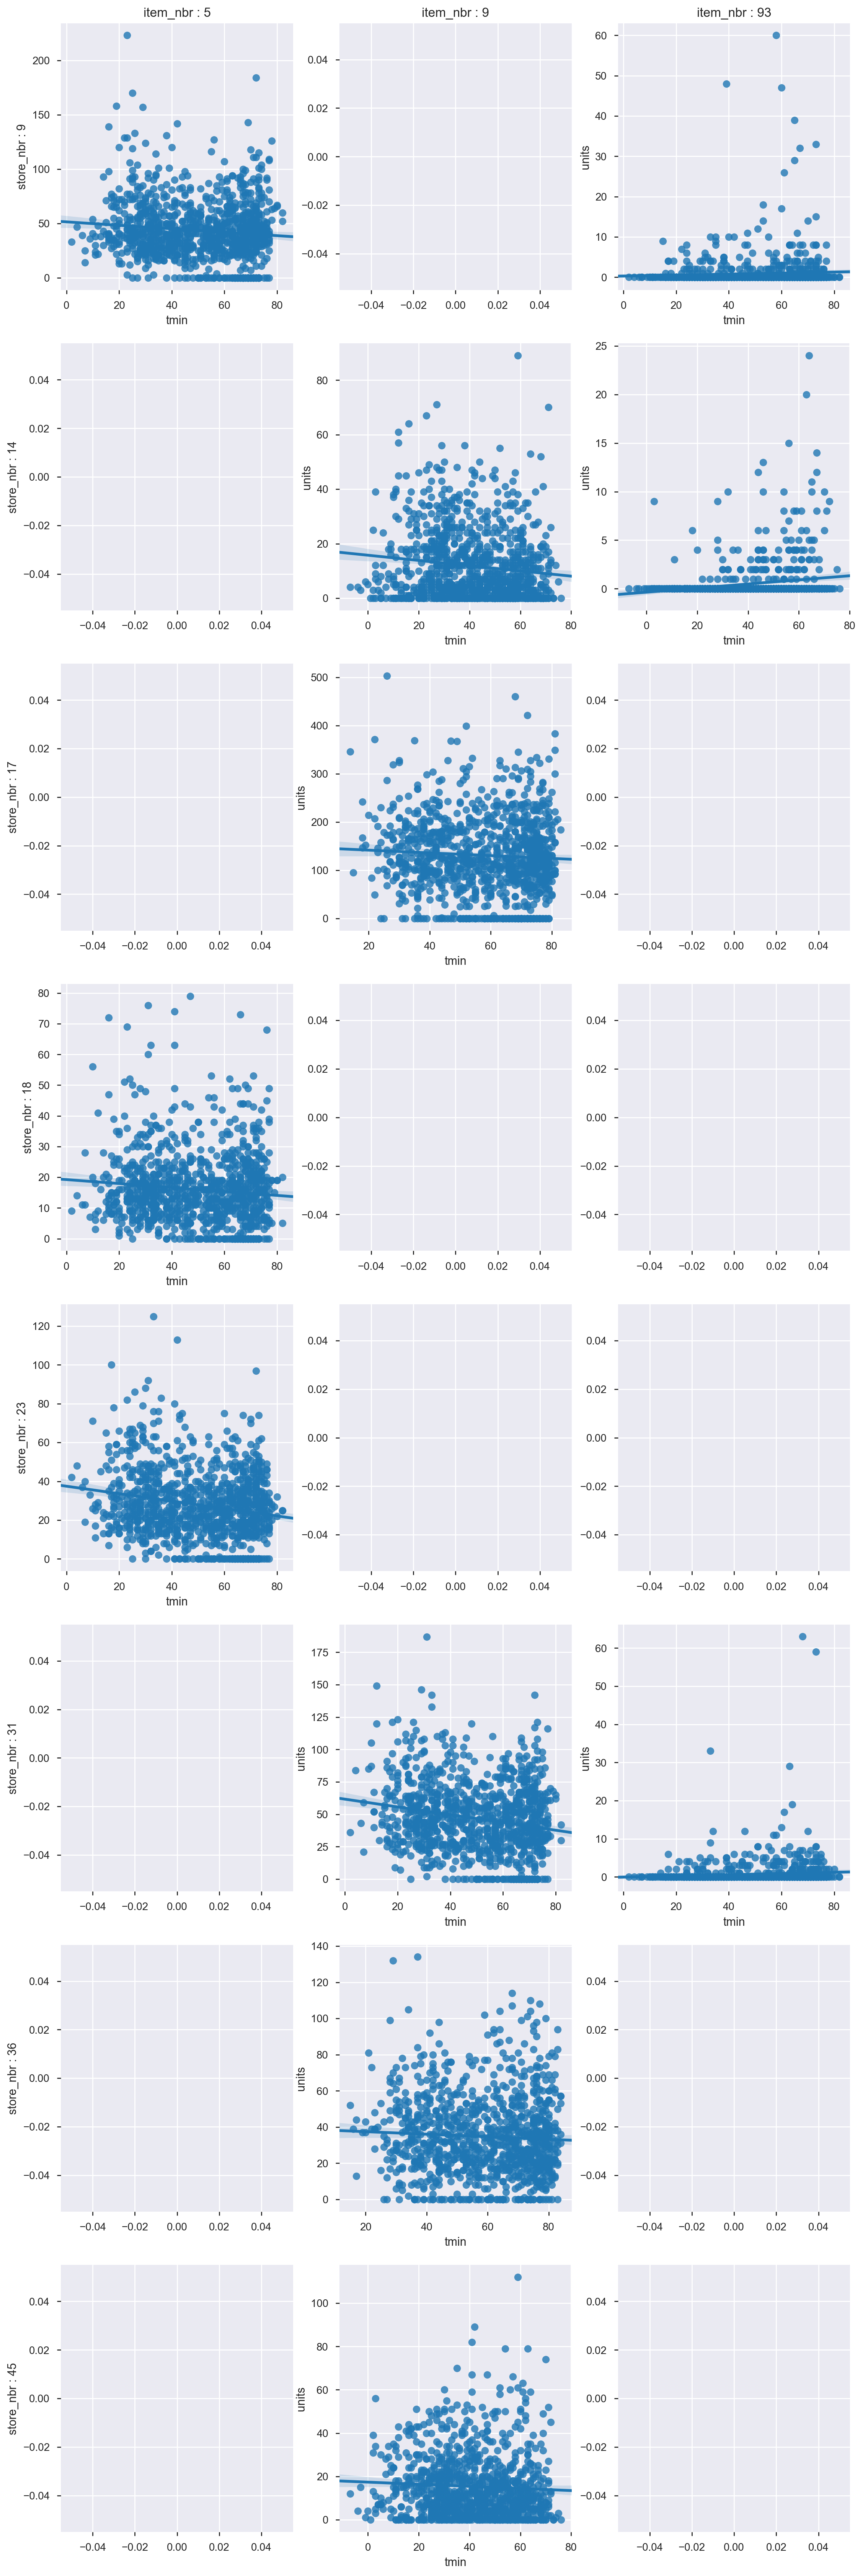

Complete!


'plot success'

In [283]:
# 멀티박스플롯
def HVXY_multi_lmplot(df, Hcol, Vcol, Xcol, Ycol, cutover=10000, cutlower=-1, Hlist=[], Vlist=[], plotsize=5):
    """This function show boxplot_table============ 

    df : 플롯팅을 할 데이터프레임 이름
    
    H : (Cardinality)한 index로 쓸수있는 열
    └---- Hcol = index처럼 쓰일 수 있는 column_name을 쓴다
            예) "item_nbr","store_nbr","station_nbr" 사용가능
          Hlist = 위의 값들 중 특정 값을 찾기위해 쓴다.
    
    V : (Cardinality)한 index로 쓸수있는 열
    └---- Vcol = index처럼 쓰일 수 있는 column_name을 쓴다
            예) "item_nbr","store_nbr","station_nbr" 사용가능
          Vlist = 위의 값들 중 특정 값을 찾기위해 쓴다.
          
    X : X축은 Continueous한 값을 넣는다. 
    └---- Xcol = X축으로 사용할 cardinality한 column_name을 쓴다
    
    Y : Y축은 실수형 값을 넣을 수 있다. units등 각종 실수형,정수형 숫자
    └---- Ycol = Y축으로 사용항 실수형,정수형 column_name을 쓴다
    
    cutover : 지정된 값을 초과하는 Y축 데이터는 빼고 플롯팅한다.
    cutlower : 지정된 값보다 작은 Y축 데이터는 빼고 플롯팅한다.
    
    plotsize : 플롯의 사이즈를 지정할 수 있음(정수형)
    
    """

    print("HVXY running...")
    #일단 입력되는 리스트의 크기를 판별한다.
    vsize=len(Vlist)
    hsize=len(Hlist)
    fig = plt.figure(figsize=(plotsize*hsize,plotsize*vsize))
    cnt=0
    for i in range(vsize):
        tmpA = df[(df[Vcol]==Vlist[i])&(df[Ycol]<cutover)&(df[Ycol]>cutlower)]
        subplot_num = [int(str(vsize)+str(hsize)+str(cnt+k)) for k in range(1,hsize+1)]
        print(subplot_num, end="")
        for j in range(hsize):
#             ax = fig.add_subplot(subplot_num[j])
            temp = tmpA[(tmpA[Hcol]==Hlist[j])]
            ax = plt.subplot2grid((vsize+1,hsize+1), (i,j))
            if i == 0:
#                 sns.distplot(ax=ax, x=Xcol, y=Ycol, data=temp, kde=True, rug=True).set_title(str(Hcol)+" : "+str(Hlist[j]))
#                 sns.lmplot(x=Xcol, y=Ycol, data=df, hue='DOW', fit_reg=True)
                try:
                    sns.regplot(ax=ax, x=Xcol, y=Ycol, data=temp).set_title(str(Hcol)+" : "+str(Hlist[j]))
                except:
                    ax.set_title(str(Hcol)+" : "+str(Hlist[j]))
                    print(', can`t plot-',Hlist[j], end="")
            else :
#                 sns.jointplot(ax=ax, x=Xcol, y=Ycol, data=temp)
#                 sns.lmplot(x=Xcol, y=Ycol, data=df, hue='FG', fit_reg=True)
                try:    
                    sns.regplot(ax=ax, x=Xcol, y=Ycol, data=temp)
                except:
                    print(', can`t plot-',Hlist[j], end="")
            if j == 0 : ax.set_ylabel(str(Vcol)+" : "+str(Vlist[i]))
            
        cnt += hsize
        print("")
    print("plotting screen...", end="")
    plt.show()
    print("Complete!")
    
    return "plot success"
# sns.factorplot(x="age", y="sex", hue="survived", row="class", data=data,
#                kind="violin", split=True, size=2, aspect=4)

HVXY_multi_lmplot(df,Hcol="item_nbr",Vcol="store_nbr",Xcol="tmin",Ycol="units",cutover=2500, Hlist=[5,9,93], Vlist=[9,14,17,18,23,31,36,45], plotsize=6)

# lmplot 함수 (자동 테이블화)
- 1축 테이블화 가능한 함수임

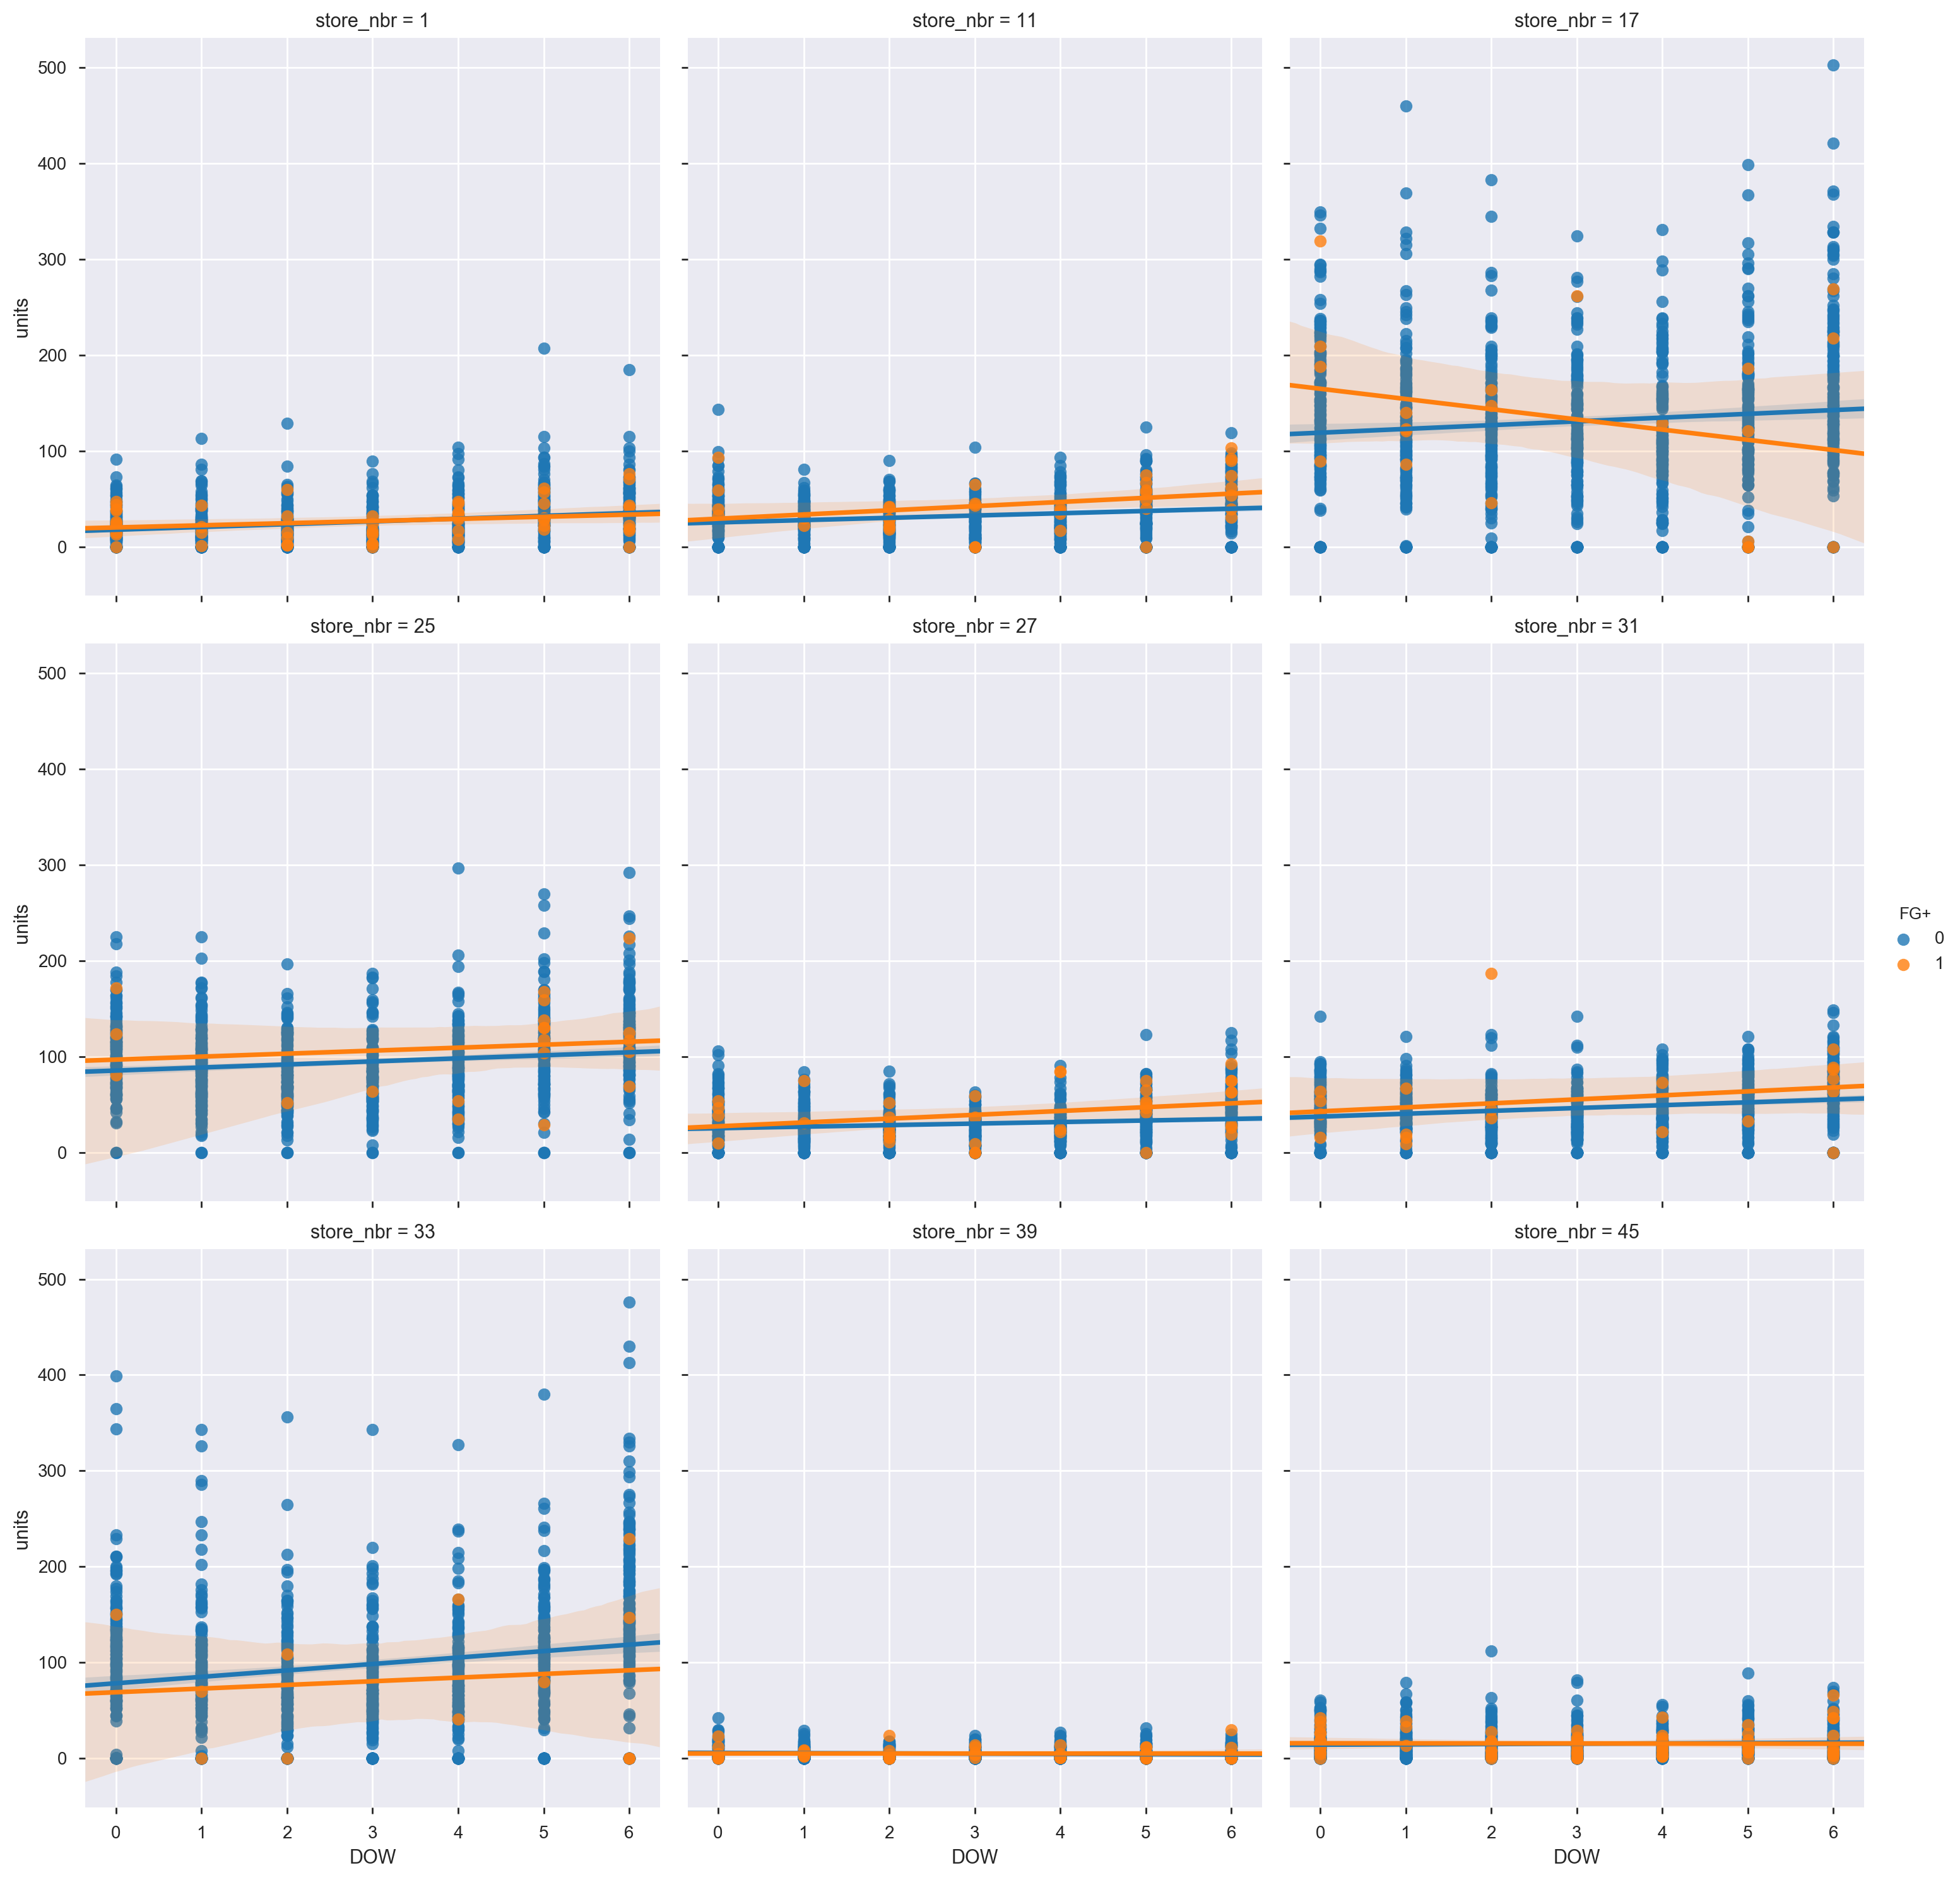

In [340]:
tdf = df[(df["store_nbr"])&(df["item_nbr"]==9)]
sns.lmplot(data=tdf, x="DOW", y="units", col='store_nbr', col_wrap=3, hue="FG+", fit_reg=True, order=1)
plt.show()

In [ ]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

# 1. 스토어별 비교 플롯뿌리기

HVXY running...
[551, 552, 553, 554, 555]
[556, 557, 558, 559, 5510]
[5511, 5512, 5513, 5514, 5515]
[5516, 5517, 5518, 5519, 5520]
[5521, 5522, 5523, 5524, 5525]
plotting screen...

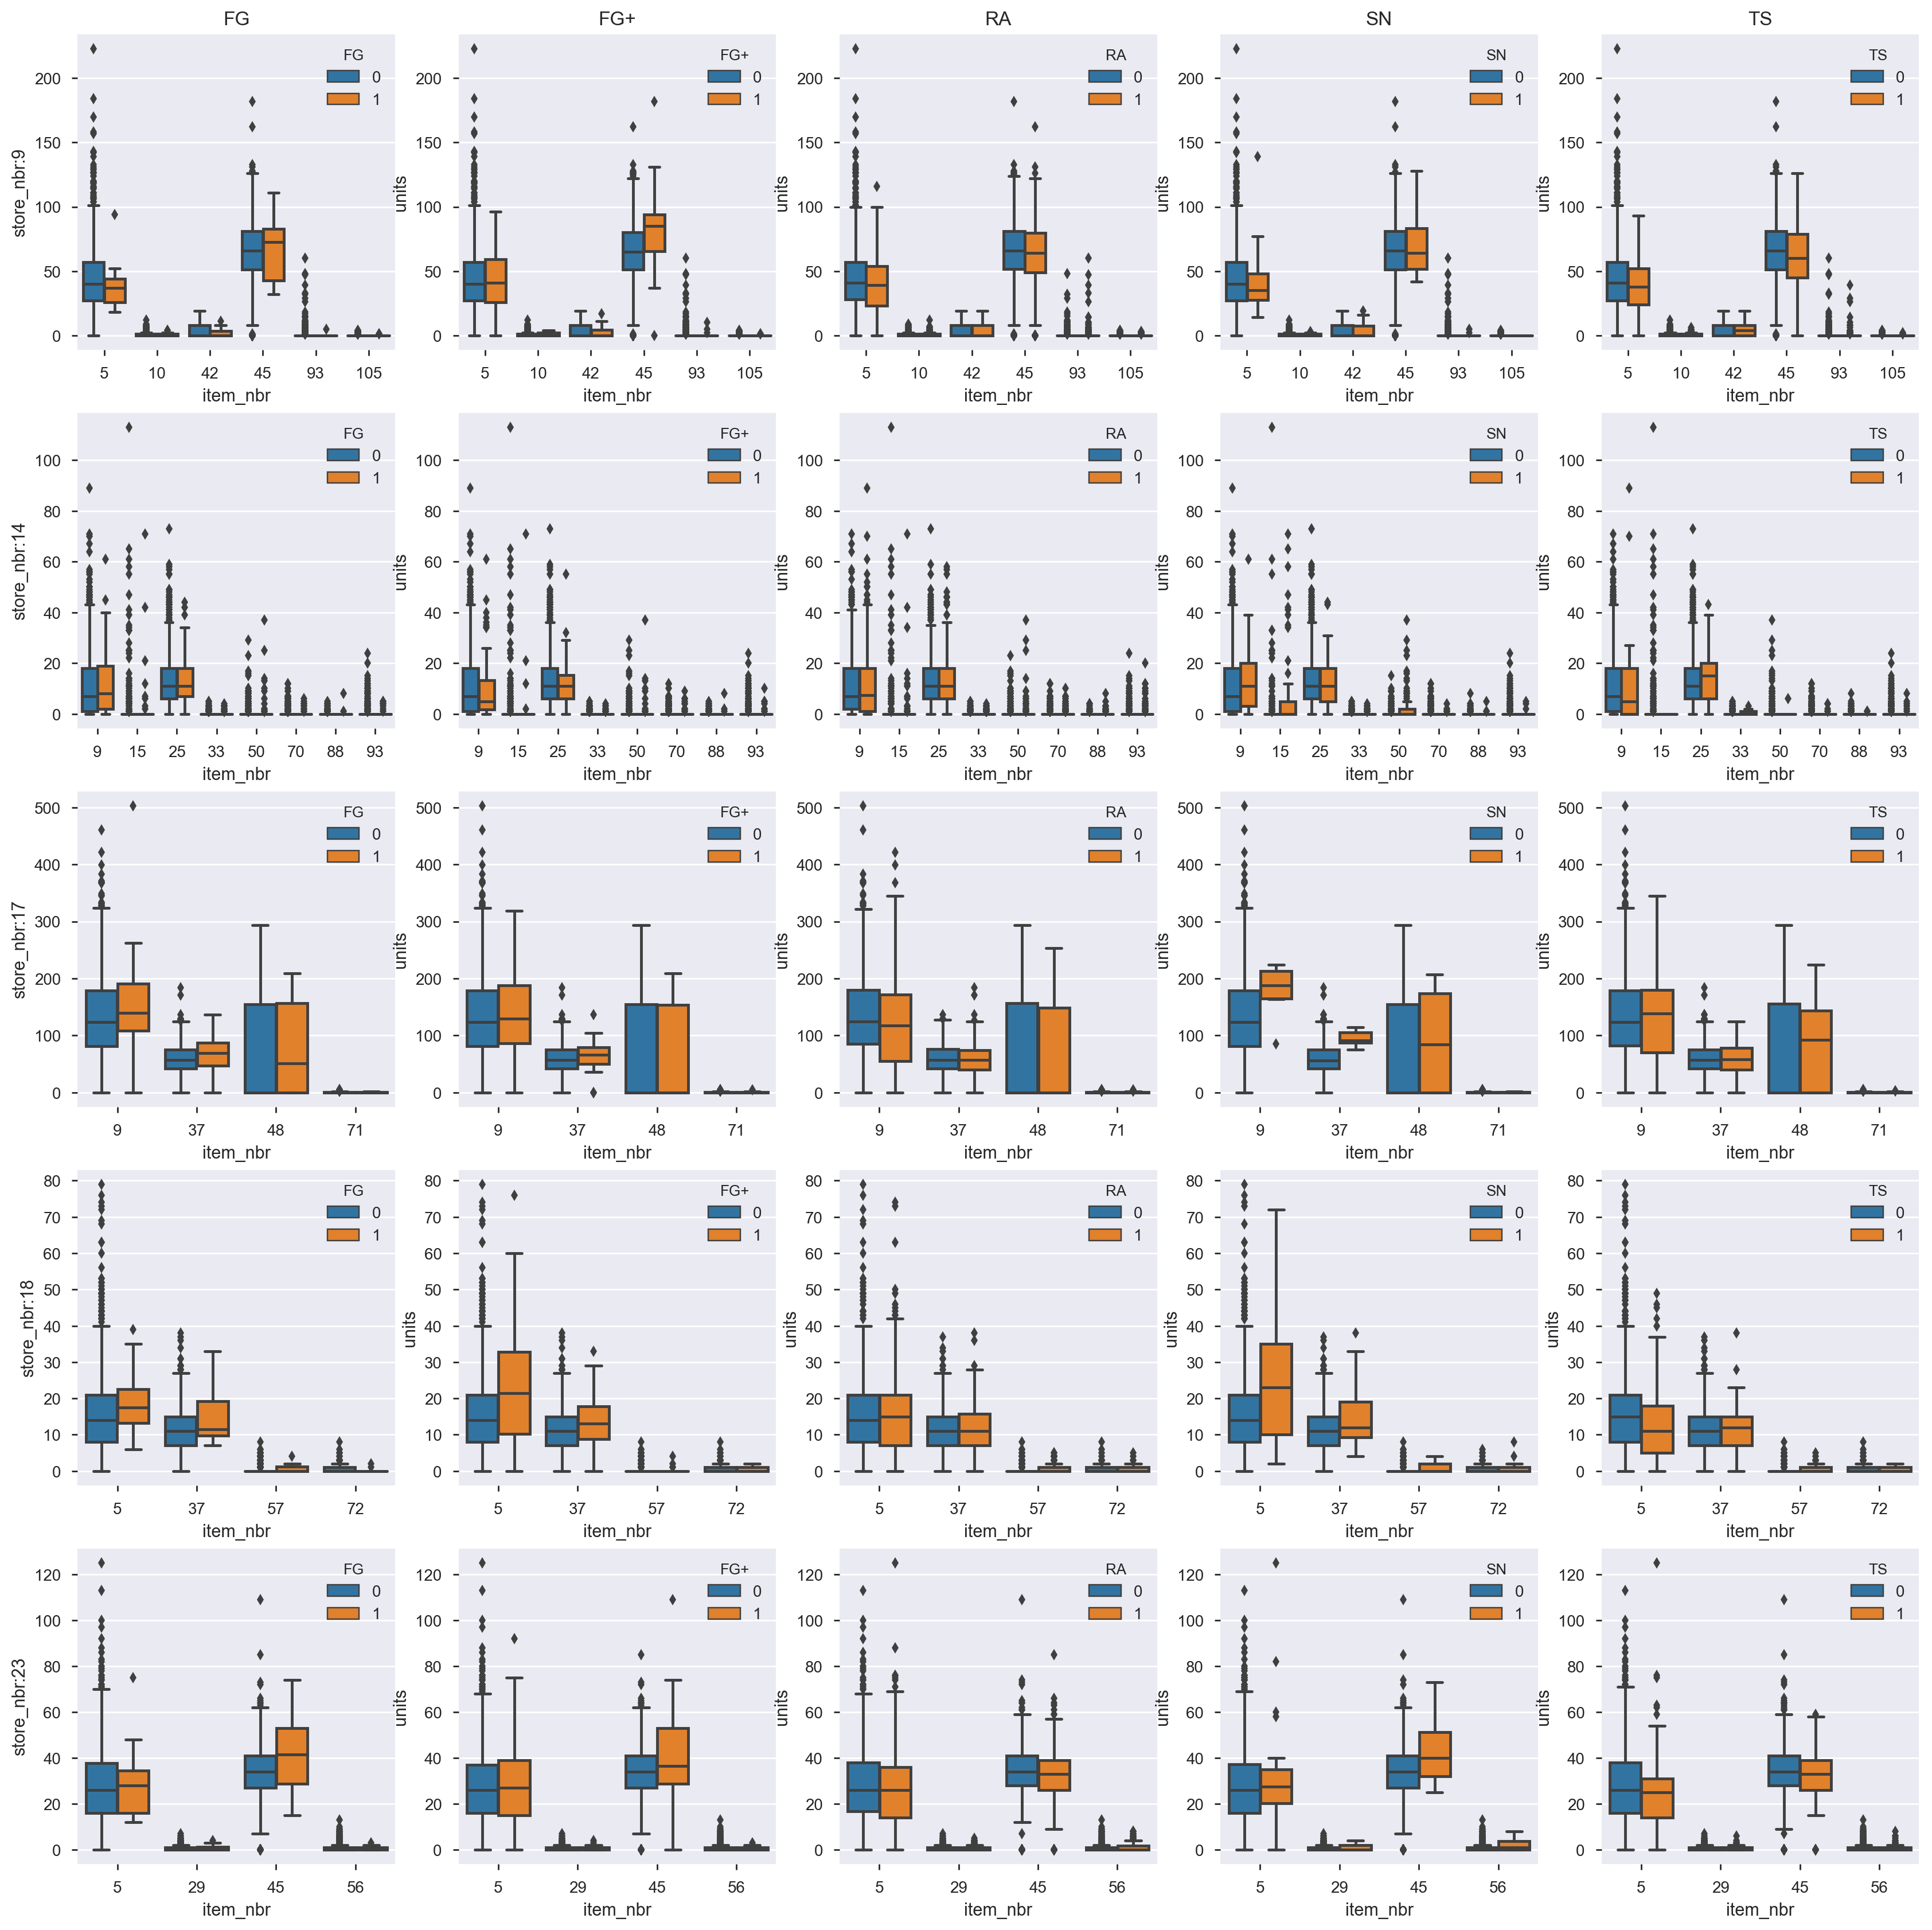

Complete!


'plot success'

In [215]:
# 배정된 스토어 = {9, 14, 17, 18, 23, 26, 30, 31, 34, 36, 45}
Hli=["FG","FG+","RA","SN","TS"]
Vli=[9,14,17,18,23]

HVXY_multi_boxplot(df,Vcol="store_nbr",Xcol="item_nbr",Ycol="units",cutover=2500,Vlist=Vli, Hlist=Hli, plotsize=5)


# 2. 아이템별 비교 플롯뿌리기

HVXY running...
[441, 442, 443, 444]
[445, 446, 447, 448]
[449, 4410, 4411, 4412]
[4413, 4414, 4415, 4416]
plotting screen...

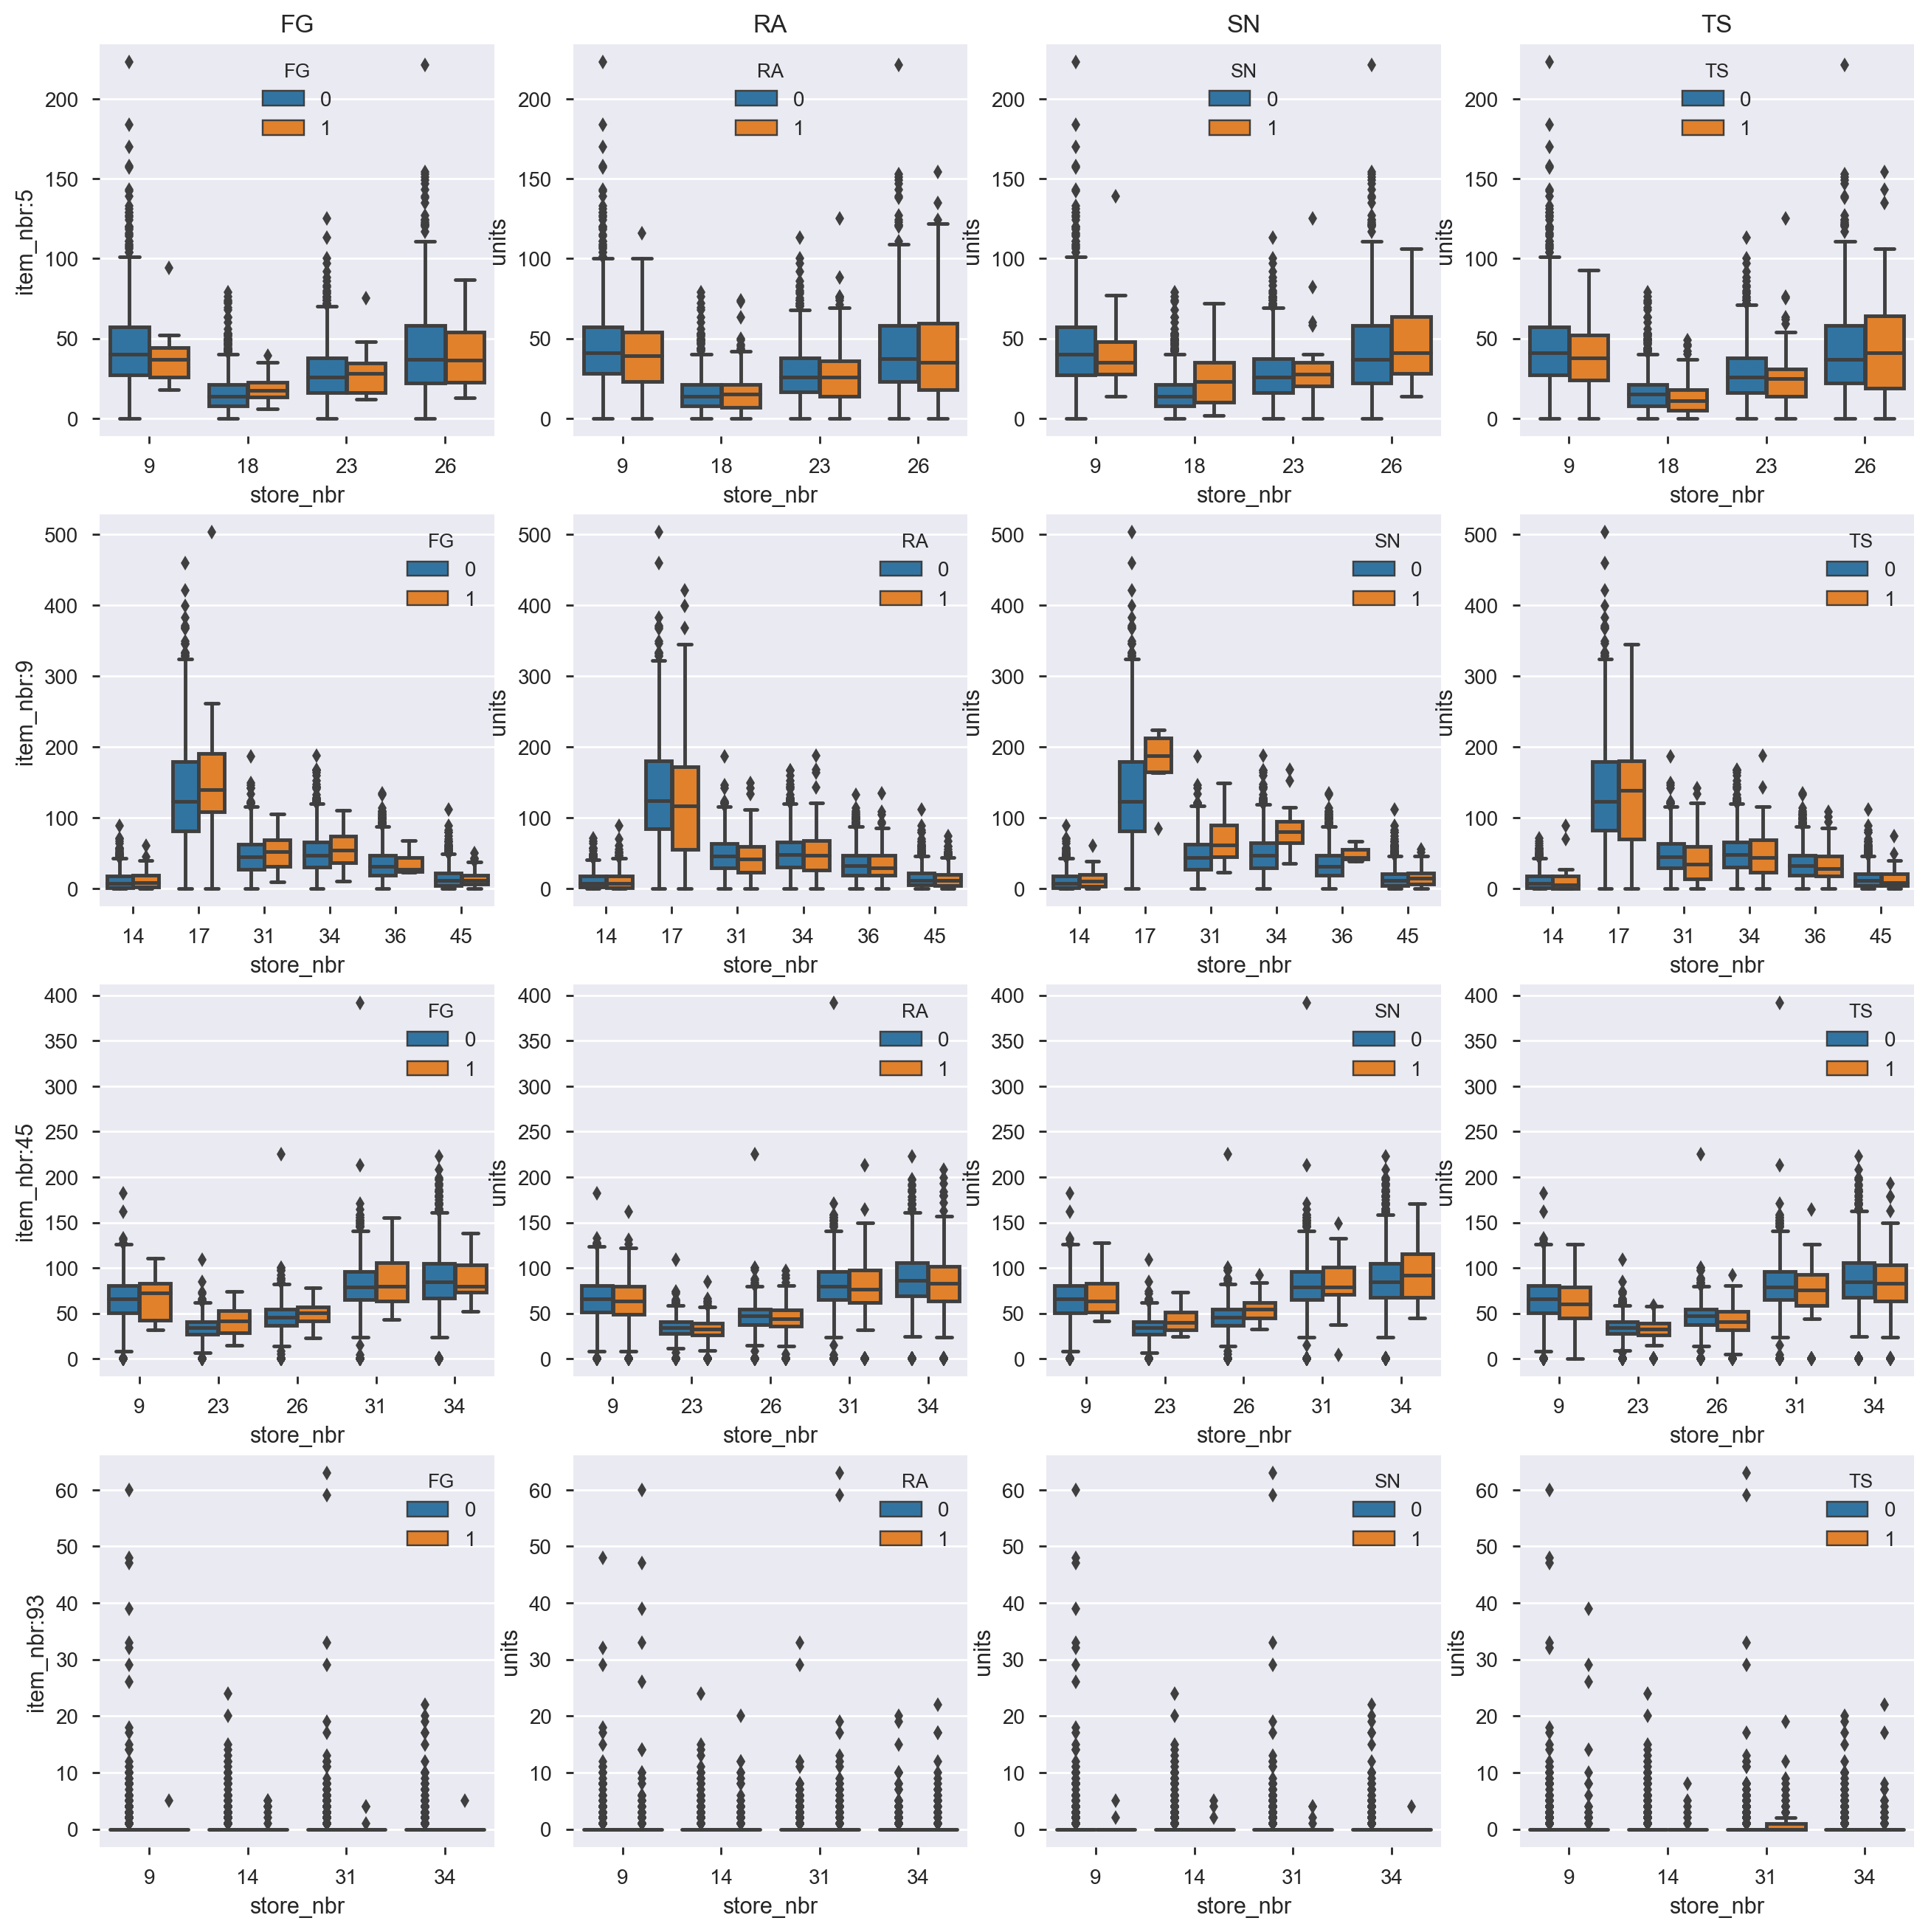

Complete!


'plot success'

In [214]:
# 10개이상의 스토어에서 판매되는 아이템들 = {5,9,45,93}
# 5개 이상의 스토어에서 판매되는 아이템들 = {15,16,37,44,50,68,86,105}
HVXY_multi_boxplot(df, Hlist=["FG","RA","SN","TS"],Vcol="item_nbr",Vlist=[5,9,45,93],Xcol="store_nbr",Ycol="units",cutover=2500, plotsize=5)


In [56]:
df.corr().round(3)

store_nbr  item_nbr  units  station_nbr   tmax   tmin   tavg  \
store_nbr        1.000    -0.156 -0.033       -0.046 -0.061 -0.030 -0.047   
item_nbr        -0.156     1.000 -0.206       -0.032  0.021 -0.003  0.009   
units           -0.033    -0.206  1.000        0.345  0.054  0.051  0.055   
station_nbr     -0.046    -0.032  0.345        1.000  0.102  0.134  0.121   
tmax            -0.061     0.021  0.054        0.102  1.000  0.911  0.979   
tmin            -0.030    -0.003  0.051        0.134  0.911  1.000  0.976   
tavg            -0.047     0.009  0.055        0.121  0.979  0.976  1.000   
depart           0.042    -0.019  0.058       -0.042  0.424  0.383  0.410   
dewpoint        -0.035     0.009  0.025        0.083  0.887  0.954  0.941   
wetbulb         -0.041     0.009  0.038        0.098  0.946  0.976  0.983   
heat             0.043    -0.009 -0.037       -0.088 -0.928 -0.912 -0.942   
cool            -0.039     0.007  0.069        0.144  0.773  0.793  0.800   
sunrise            NaN       NaN    NaN          NaN    NaN    NaN    NaN   
sunset             NaN       NaN    NaN          NaN    NaN    NaN    NaN   
snowfall         0.043    -0.010 -0.005        0.097 -0.177 -0.136 -0.161   
preciptotal      0.005    -0.003 -0.036       -0.021 -0.022  0.070  0.023   
stnpressure      0.095    -0.084 -0.187       -0.521 -0.405 -0.382 -0.403   
sealevel        -0.014     0.018  0.021        0.014 -0.366 -0.417 -0.399   
avgspeed         0.084    -0.066  0.030        0.184 -0.141 -0.033 -0.090   
resultspeed      0.067    -0.049  0.026        0.142 -0.125 -0.022 -0.076   
resultdir        0.030    -0.028 -0.018       -0.049 -0.170 -0.211 -0.194   
TS              -0.005     0.011 -0.003        0.017  0.146  0.189  0.171   
GR                 NaN       NaN    NaN          NaN    NaN    NaN    NaN   
RA               0.005     0.001 -0.042       -0.067 -0.042  0.090  0.023   
DZ               0.058    -0.031  0.009        0.107 -0.069 -0.034 -0.053   
SN               0.037    -0.013 -0.017        0.004 -0.401 -0.337 -0.378   
SG               0.008    -0.006  0.001        0.005 -0.010 -0.008 -0.009   
GS               0.011    -0.007  0.005        0.016 -0.019 -0.012 -0.016   
PL               0.019    -0.012  0.005        0.028 -0.037 -0.032 -0.032   
FG+              0.007    -0.009 -0.028       -0.092 -0.075 -0.052 -0.065   
FG               0.008    -0.010 -0.030       -0.083 -0.099 -0.063 -0.083   
BR               0.006     0.001 -0.041       -0.068 -0.135 -0.033 -0.088   
UP              -0.008     0.006 -0.007       -0.056 -0.197 -0.165 -0.185   
HZ               0.020    -0.018  0.040        0.126 -0.106 -0.085 -0.098   
FU              -0.004     0.004  0.004       -0.005  0.006 -0.014 -0.004   
DU               0.017    -0.011  0.006        0.009  0.003 -0.008 -0.003   
SQ              -0.000    -0.000  0.003        0.006  0.036  0.029  0.033   
FZ               0.003    -0.002  0.000       -0.026 -0.173 -0.150 -0.167   
MI               0.008    -0.005 -0.010       -0.013 -0.005 -0.008 -0.007   
PR               0.008    -0.006  0.001        0.005 -0.009 -0.007 -0.008   
BC               0.009    -0.003  0.004        0.019 -0.004 -0.006 -0.005   
BL               0.021    -0.008 -0.007        0.050 -0.103 -0.099 -0.103   
VC              -0.036     0.026 -0.008       -0.029  0.110  0.135  0.125   
tdelta          -0.080     0.056  0.017       -0.057  0.356 -0.062  0.160   
year            -0.000    -0.000 -0.133       -0.000 -0.040 -0.032 -0.037   
month            0.000    -0.000 -0.024        0.000  0.269  0.287  0.285   
day             -0.000    -0.000 -0.058        0.000  0.030  0.024  0.026   
DOW             -0.000     0.000  0.037        0.000 -0.007 -0.005 -0.007   
SS               0.000     0.000 -0.037       -0.000  0.507  0.525  0.528   
mon              0.000    -0.000  0.007        0.000  0.005  0.009  0.007   
tue             -0.000    -0.000 -0.014       -0.000  0.007 -0.003  0.002   
wed      

In [51]:
import pandas_profiling as pdp
pdp.ProfileReport(df)

# VIF다중공산성 판단

In [ ]:
df.columns

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#numeric은 판단이 안되므로 정리한다

dfX = df[['tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool',\
          'stnpressure', 'sealevel',
          'avgspeed', 'resultspeed', 'resultdir', 'tdelta']]

dfX = dfX.dropna()

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif

C:\Users\creal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF Factor     features
0            inf         tmax
1            inf         tmin
2   1.025791e+05         tavg
3   1.306210e+00       depart
4   7.465311e+01     dewpoint
5   2.571153e+02      wetbulb
6   2.529218e+03         heat
7   7.916133e+02         cool
8   1.754303e+00  stnpressure
9   1.531788e+00     sealevel
10  7.176085e+00     avgspeed
11  6.926365e+00  resultspeed
12  1.114027e+00    resultdir
13           inf       tdelta

In [42]:
df.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'tdelta', 'year', 'month', 'day', 'DOW',
       'SS', 'quarter', 'week_day_name', 'day_of_year', 'weekend', 'weekend2'],
      dtype='object')

In [174]:
# 샘플링!
dfT = df[(df['item_nbr']==16)&(df['units']<100)&(df['units']>0)&(df['store_nbr']!=35)]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfT.iloc[:,1:],\
                                                    dfT.units, test_size=0.30, random_state=2018)


In [175]:

formula = "I(1.3*units**0.4) ~ C(store_nbr) + C(month) + C(day) + C(week_day_name) + BL + VC + HZ + TS + RA + SN + FG + BR + 0"

model = sm.OLS.from_formula(formula=formula, data=X_train)
result = model.fit()

print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     I(1.3 * units ** 0.4)   R-squared:                       0.513
Model:                               OLS   Adj. R-squared:                  0.506
Method:                    Least Squares   F-statistic:                     73.34
Date:                   Tue, 03 Jul 2018   Prob (F-statistic):               0.00
Time:                           22:12:45   Log-Likelihood:                -5016.1
No. Observations:                   4309   AIC:                         1.016e+04
Df Residuals:                       4247   BIC:                         1.055e+04
Df Model:                             61                                         
Covariance Type:               nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

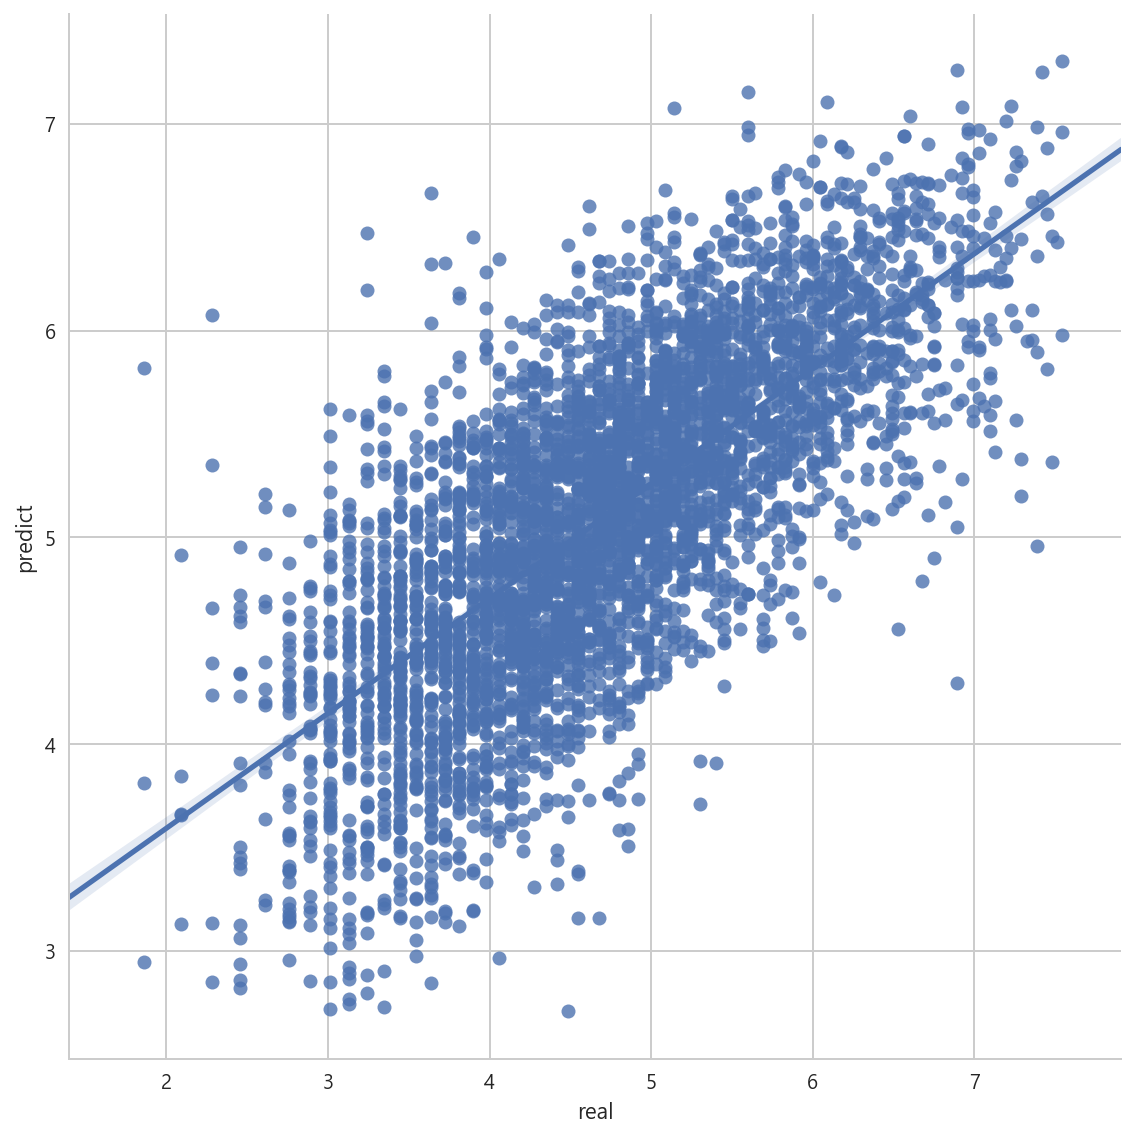

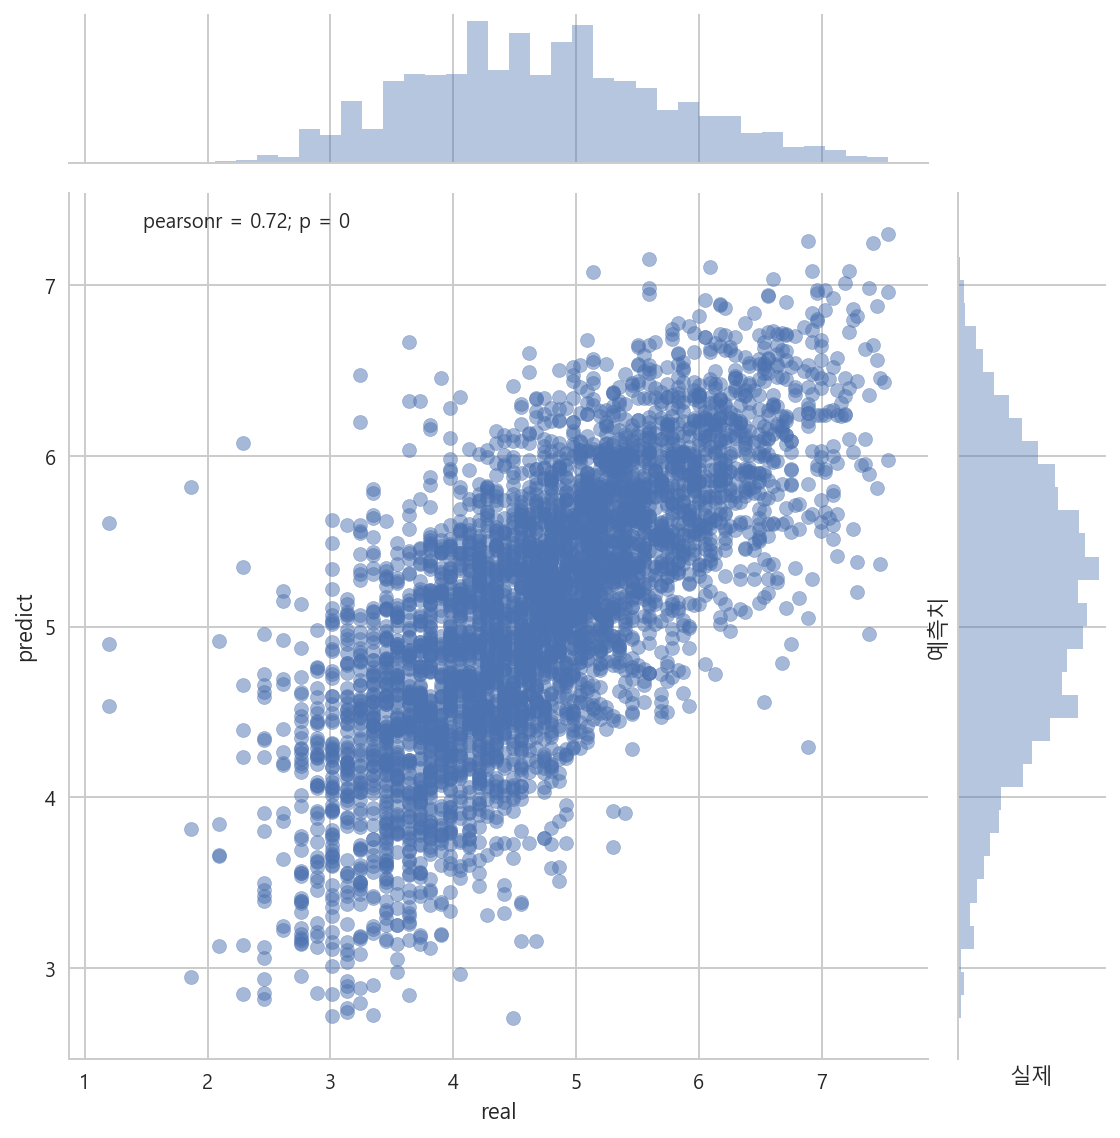

In [189]:
predictions = result.predict(X_train)
da = pd.DataFrame()
da["real"]=1.2*X_train["units"]**0.4
da["predict"]=predictions


g= sns.lmplot(data=da, x="real", y="predict", size = 8, order=1)

g.set(xlim=(1.4, None))

k= sns.jointplot(data=da, x="real", y="predict", size = 8, alpha=0.5)

# k.set(xlim=(1.4, None))

plt.xlabel(u"실제")
plt.ylabel(u"예측치")
plt.show()



# from sklearn.datasets import make_regression
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score

# X, y, coef = make_regression(n_samples=1000, n_features=1, noise=20, coef=True, random_state=0)

# model = LinearRegression()
# cv = KFold(10)

# scores = np.zeros(10)
# for i, (train_index, test_index) in enumerate(cv.split(X)):
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     scores[i] = r2_score(y_test, y_pred)

# scores

# 아웃라이어, 레버리지

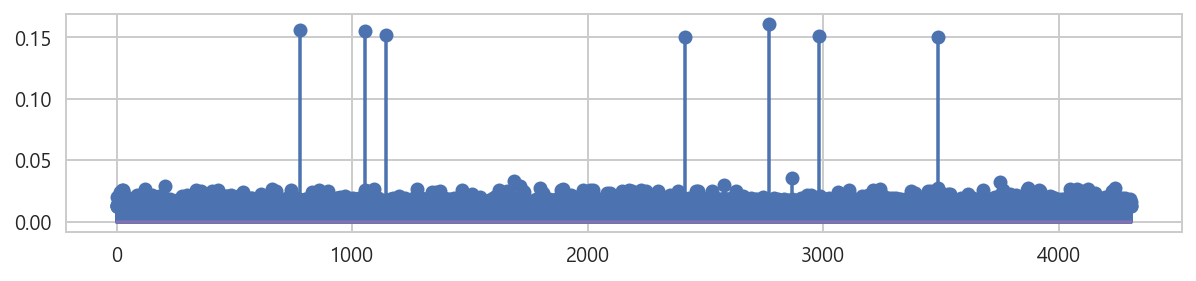

In [177]:
influence = result.get_influence()
hat = influence.hat_matrix_diag

plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.show()

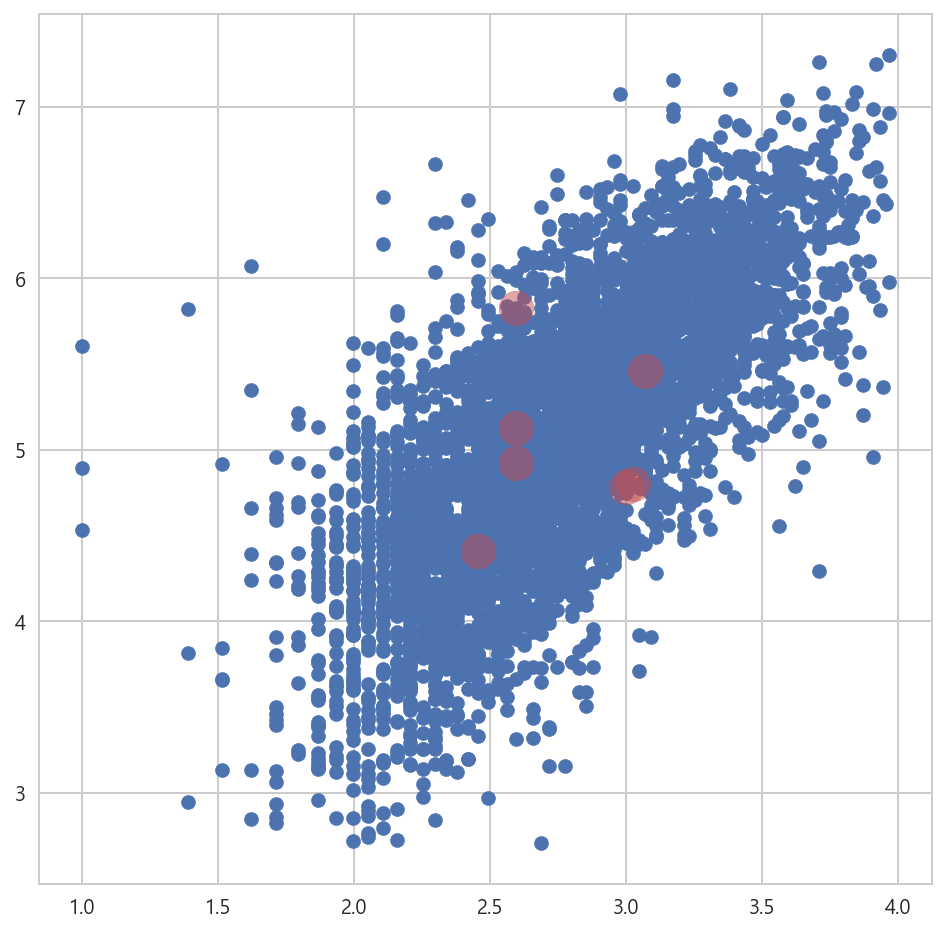

In [185]:
plt.figure(figsize=(8,8))
# g=sns.lmplot(data=da, x="real", y="predict", size = 8, order=1)
# g.set(xlim=(1.4, None))

idx = hat > 0.05

X_train.units[idx]
Xa=X_train["units"]**0.30
plt.scatter(Xa, predictions)
plt.scatter(Xa[idx], predictions[idx], s=300, c="r", alpha=0.5)

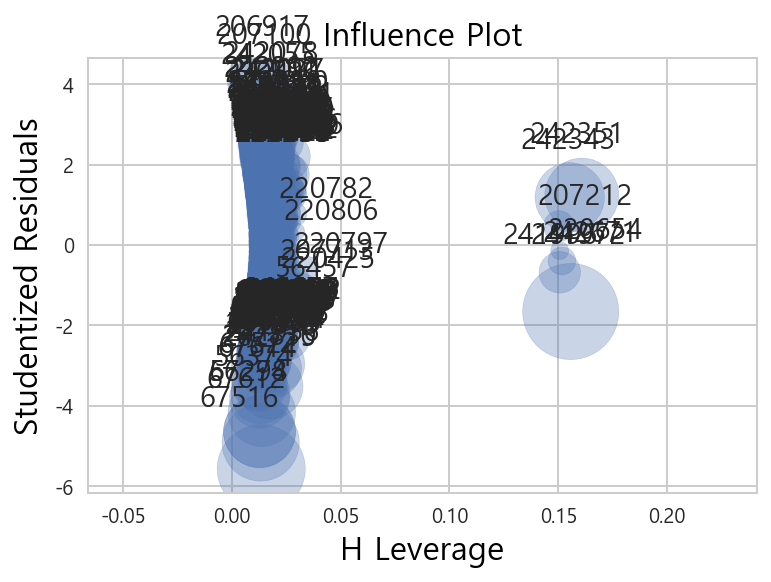

In [179]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

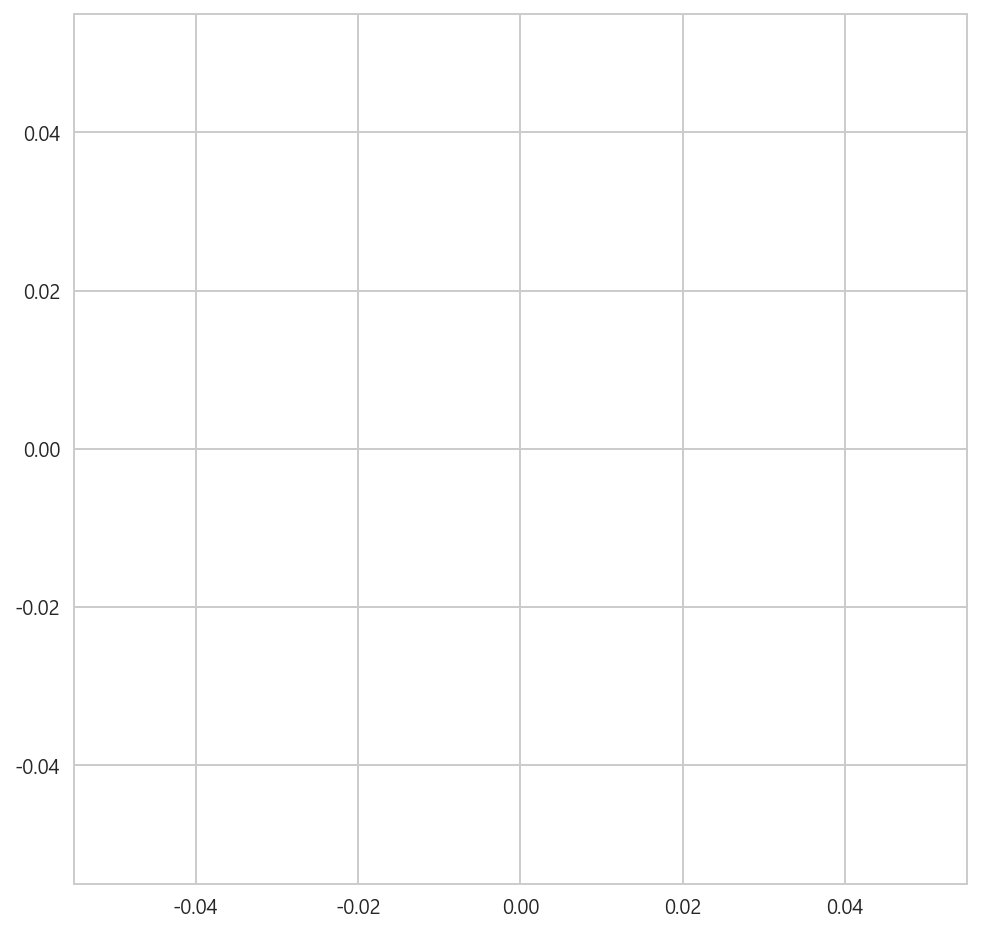

array([   5,   22,   26,   66,   69,   71,   89,   94,  109,  158,  167,
        171,  179,  206,  221,  227,  241,  248,  269,  271,  273,  276,
        278,  296,  303,  319,  342,  363,  375,  401,  420,  423,  427,
        461,  462,  481,  592,  606,  637,  682,  703,  723,  727,  730,
        774,  778,  788,  831,  861,  870,  900,  909,  936,  939,  945,
        951,  955,  990,  991, 1001, 1017, 1037, 1041, 1054, 1076, 1113,
       1118, 1127, 1131, 1134, 1153, 1301, 1318, 1347, 1348, 1360, 1396,
       1408, 1416, 1454, 1469, 1472, 1480, 1525, 1565, 1607, 1611, 1623,
       1631, 1664, 1689, 1690, 1696, 1707, 1717, 1732, 1778, 1813, 1949,
       2008, 2021, 2038, 2042, 2079, 2098, 2107, 2170, 2175, 2187, 2195,
       2196, 2213, 2225, 2241, 2262, 2293, 2305, 2308, 2326, 2333, 2347,
       2352, 2373, 2412, 2427, 2457, 2462, 2473, 2485, 2541, 2549, 2574,
       2582, 2597, 2603, 2604, 2628, 2632, 2643, 2658, 2736, 2768, 2772,
       2861, 2904, 2946, 2973, 2975, 2979, 2982, 29

In [186]:
from statsmodels.graphics import utils

cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(predictions) - 2)
idx = np.where(cooks_d2 > fox_cr)[0]
plt.figure(figsize=(8,8))
ax = plt.subplot()
# plt.scatter(Xa, predictions)
plt.scatter(Xa[idx], predictions[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx, 
                    list(zip(Xa[idx], predictions[idx])), [(-20, 15)] * len(idx), size="small", ax=ax)
plt.show()
idx

# 리지, 라쏘 엘라스틱

In [192]:
def plot_statsmodels(result):
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    plt.plot(xx, result.predict(dfxx).values)
    plt.show()

In [193]:
result2 = model.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result2.params)
plot_statsmodels(result2) 

C(store_nbr)[5]                  3.352175
C(store_nbr)[12]                 3.944461
C(store_nbr)[16]                 3.768336
C(store_nbr)[19]                 2.677796
C(store_nbr)[30]                 3.989134
C(store_nbr)[41]                 4.031800
C(store_nbr)[43]                 4.358327
C(month)[T.2]                    0.685138
C(month)[T.3]                    0.368112
C(month)[T.4]                    0.000000
C(month)[T.5]                    0.000000
C(month)[T.6]                    0.279492
C(month)[T.7]                    0.336238
C(month)[T.8]                    0.651754
C(month)[T.9]                    0.476960
C(month)[T.10]                   0.331071
C(month)[T.11]                   0.000000
C(month)[T.12]                   0.526373
C(day)[T.2]                      0.705407
C(day)[T.3]                      0.651719
C(day)[T.4]                      0.593237
C(day)[T.5]                      0.910044
C(day)[T.6]                      0.713243
C(day)[T.7]                      0

NameError: name 'X' is not defined